# IMPORTS

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Exercise 1

Read up on one of the language technologies mentioned in this section, such as word sense disambiguation, semantic role labeling, question answering, machine translation, named entity detection. Find out what type and quantity of annotated data is required for developing such systems. Why do you think a large amount of data is required?

## Word sense disambiguation

https://en.wikipedia.org/wiki/Word-sense_disambiguation

https://en.wikipedia.org/wiki/Word-sense_disambiguation#Supervised_methods

However, these supervised methods are subject to a new knowledge acquisition bottleneck since they rely on substantial amounts of manually sense-tagged corpora for training, which are laborious and expensive to create.

## Semantic role labeling

https://en.wikipedia.org/wiki/Semantic_role_labeling

The PropBank corpus added manually created semantic role annotations to the Penn TreeBank corpus of Wall Street Journal texts. Many automatic semantic role labeling systems have used PropBank as a training dataset to learn how to annotate new sentences automatically.

## Question answering

https://en.wikipedia.org/wiki/Question_answering

## Machine translation

https://en.wikipedia.org/wiki/Machine_translation

## Named-entity recognition

https://en.wikipedia.org/wiki/Named-entity_recognition

From my point of view, a large amount of data is needed because of limitless natural language features and nuances that are unique for each language.

# Exercise 2

Using any of the three classifiers described in this chapter, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

In [100]:
from nltk.corpus import names
from nltk.classify import (NaiveBayesClassifier, 
                           DecisionTreeClassifier, 
                           MaxentClassifier, 
                           apply_features,
                           accuracy)

In [101]:
def gender_features(word):
    return {
        'last_letter': word[-1].lower(),
#         'first_letter': word[0].lower(),
#         'suffix_2': word[-2:].lower(),
        'prefix_2': word[:2].lower(),
#         'middle_letter': word[len(word) // 2].lower()
#         'length': len(word),
    }

In [102]:
raw_data = ([(name, 'male') for name in names.words('male.txt')] +
            [(name, 'female') for name in names.words('female.txt')])

In [103]:
np.random.seed(42)
np.random.shuffle(raw_data)

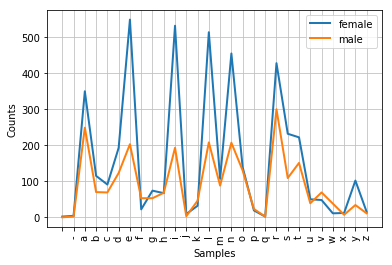

In [104]:
from nltk.probability import ConditionalFreqDist

cfd  = ConditionalFreqDist((g, w[len(w) // 2].lower()) for w, g in raw_data[1000:])
cfd.plot()

In [105]:
features = apply_features(gender_features, raw_data)

In [106]:
test_set, devtest_set, train_set = features[:500], features[500:1000], features[1000:]

In [107]:
naive_bayes_classifier = NaiveBayesClassifier.train(train_set)
tree_classifier = DecisionTreeClassifier.train(train_set)
entropy_classifier = MaxentClassifier.train(train_set, trace=0)

In [108]:
for clf in [naive_bayes_classifier, tree_classifier, entropy_classifier]:
    print(clf.__class__.__name__, accuracy(clf, devtest_set), '|')

NaiveBayesClassifier 0.794 |
DecisionTreeClassifier 0.756 |
MaxentClassifier 0.78 |


LAST_LETTER

NaiveBayesClassifier 0.774 |
DecisionTreeClassifier 0.774 |
MaxentClassifier 0.774 |

<s>FIRST_LETTER

NaiveBayesClassifier 0.588 |
DecisionTreeClassifier 0.588 |
MaxentClassifier 0.588 |</s>

<s>LAST_LETTER + FIRST_LETTER

NaiveBayesClassifier 0.77 |
DecisionTreeClassifier 0.766 |
MaxentClassifier 0.774 |</s>

LAST_LETTER + PREFIX_2

NaiveBayesClassifier 0.794 |
DecisionTreeClassifier 0.756 |
MaxentClassifier 0.78 |

<s>LAST_LETTER + PREFIX_2 + SUFFIX_2

NaiveBayesClassifier 0.778 |
DecisionTreeClassifier 0.742 |
MaxentClassifier 0.784 |</s>

<s>LAST_LETTER + FIRST_LETTER + PREFIX_2

NaiveBayesClassifier 0.774 |
DecisionTreeClassifier 0.756 |
MaxentClassifier 0.78 |</s>

<s>LAST_LETTER + PREFIX_2 + MIDDLE_LETTER

NaiveBayesClassifier 0.77 |
DecisionTreeClassifier 0.762 |
MaxentClassifier 0.782 |</s>

<s>LAST_LETTER + PREFIX_2 + LENGTH

NaiveBayesClassifier 0.784 |
DecisionTreeClassifier 0.776 |
MaxentClassifier 0.784 |</s>

In [110]:
accuracy(naive_bayes_classifier, devtest_set)

0.794

In [111]:
accuracy(naive_bayes_classifier, test_set)

0.772

# Exercise 3

The Senseval 2 Corpus contains data intended to train word-sense disambiguation classifiers. It contains data for four words: hard, interest, line, and serve. Choose one of these four words, and load the corresponding data:

In [112]:
from nltk.corpus import senseval
from nltk.classify import NaiveBayesClassifier, accuracy
from nltk.probability import FreqDist

In [113]:
instances = senseval.instances('interest.pos')
size = int(len(instances) * 0.1)
train_set, test_set = instances[size:], instances[:size]

Using this dataset, build a classifier that predicts the correct sense tag for a given instance. See the corpus HOWTO at http://nltk.org/howto for information on using the instance objects returned by the Senseval 2 Corpus.

In [114]:
def sense_features(instance):
    features = {}
    features['pos'] = instance.context[instance.position][1]
    features['prev_pos'] = (instance.context[instance.position - 1][1]
                            if instance.position else '<START>')
    features['next_pos'] = (instance.context[instance.position + 1][1]
                            if instance.position != (len(instance.context) - 1) else '<END>')
    features['prev_token'] = (instance.context[instance.position - 1][0].lower()
                              if instance.position else '<START>')
    features['next_token'] = (instance.context[instance.position + 1][0].lower()
                              if instance.position != (len(instance.context) - 1) else '<END>')
    return features

In [115]:
train_features = [(sense_features(instance), instance.senses[0]) for instance in train_set]
# devtest_features = [(sense_features(instance), instance.senses[0]) for instance in train_set[1800:]]
test_features = [(sense_features(instance), instance.senses[0]) for instance in test_set]

In [116]:
clf = NaiveBayesClassifier.train(train_features)

In [117]:
accuracy(clf, train_features)

0.8977485928705441

In [118]:
accuracy(clf, test_features)

0.885593220338983

In [119]:
clf.show_most_informative_features()

Most Informative Features
                next_pos = 'NNS'          intere : intere =    134.8 : 1.0
                     pos = 'NNS'          intere : intere =     70.7 : 1.0
              next_token = 'in'           intere : intere =     63.6 : 1.0
              prev_token = 'other'        intere : intere =     53.7 : 1.0
              next_token = 'of'           intere : intere =     39.8 : 1.0
                next_pos = '.'            intere : intere =     26.1 : 1.0
                next_pos = 'NN'           intere : intere =     24.4 : 1.0
                next_pos = 'TO'           intere : intere =     23.9 : 1.0
              prev_token = 'and'          intere : intere =     18.3 : 1.0
                prev_pos = 'VBN'          intere : intere =     18.1 : 1.0


# Exercise 4

Using the movie review document classifier discussed in this chapter, generate a list of the 30 features that the classifier finds to be most informative. Can you explain why these particular features are informative? Do you find any of them surprising?

In [120]:
from nltk.corpus import movie_reviews
from nltk.probability import FreqDist
from nltk.classify import NaiveBayesClassifier, accuracy

In [121]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [122]:
np.random.seed(42)
np.random.shuffle(documents)

In [123]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = [w for w, f in all_words.most_common(2000)]

In [124]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [125]:
featuresets = apply_features(document_features, documents)

In [126]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [127]:
classifier = NaiveBayesClassifier.train(train_set)

In [128]:
accuracy(classifier, test_set)

0.82

In [129]:
classifier.show_most_informative_features(20)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.9 : 1.0
         contains(mulan) = True              pos : neg    =      9.1 : 1.0
        contains(seagal) = True              neg : pos    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.6 : 1.0
         contains(damon) = True              pos : neg    =      6.1 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
          contains(jedi) = True              pos : neg    =      5.3 : 1.0
         contains(awful) = True              neg : pos    =      5.3 : 1.0
        contains(wasted) = True              neg : pos    =      5.3 : 1.0
          contains(lame) = True              neg : pos    =      5.1 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.0 : 1.0
         contains(waste) = True              neg : pos    =      5.0 : 1.0
        contains(poorly) = True              neg : pos    =      4.8 : 1.0

Some of these features are genuine positive or negative adjectives, but also there are features that are actor's or actress's indicators such as Mulan, Seagal, Flynt, etc.

# Exercise 5

Select one of the classification tasks described in this chapter, such as name gender detection, document classification, part-of-speech tagging, or dialog act classification. Using the same training and test data, and the same feature extractor, build three classifiers for the task: a decision tree, a naive Bayes classifier, and a Maximum Entropy classifier. Compare the performance of the three classifiers on your selected task. How do you think that your results might be different if you used a different feature extractor?

Look at Exercise 2.

# Exercise 6

The synonyms strong and powerful pattern differently (try combining them with chip and sales). What features are relevant in this distinction? Build a classifier that predicts when each word should be used.

In [130]:
from nltk.corpus import brown
from nltk.classify import (NaiveBayesClassifier, 
                           MaxentClassifier, 
                           DecisionTreeClassifier, 
                           accuracy)
from nltk.probability import FreqDist

In [131]:
data_00 = [{'context': tagged_sent, 'position': i, 'label': 'strong'}
           for tagged_sent in brown.tagged_sents()
           for i, (word, tag) in enumerate(tagged_sent)
           if word.lower() == 'strong' and tag.startswith('JJ')]

In [132]:
data_01 = [{'context': tagged_sent, 'position': i, 'label': 'powerful'}
           for tagged_sent in brown.tagged_sents()
           for i, (word, tag) in enumerate(tagged_sent)
           if word.lower() == 'powerful' and tag.startswith('JJ')]

In [133]:
data = data_00 + data_01

In [134]:
np.random.seed(42)
np.random.shuffle(data)

In [220]:
def context_features(context, i):
    return {
        'prev_pos': context[i - 1][1] if i > 0 else '<START>',
#         'prev_pos_2': context[i - 2][1] if i > 1 else '<START>',
#         'prev_pos_3': context[i - 3][1] if i > 2 else '<START>',
#         'max_pos': FreqDist([t for w, t in context]).max(),
#         'next_pos': context[i + 1][1] if i < (len(context) - 1) else '<END>',
#         'next_pos_2': context[i + 2][1] if i < (len(context) - 2) else '<END>',
#         'next_pos_3': context[i + 3][1] if i < (len(context) - 3) else '<END>',
#         'prev_token': context[i - 1][0].lower() if i > 0 else '<START>',
#         'next_token': context[i + 1][0].lower() if i < (len(context) - 1) else '<END>',
#         'length': len(context),
#         'ratio': i / (len(context) - 1)
    }

In [221]:
features = [(context_features(instance['context'], instance['position']), instance['label']) 
            for instance in data]

In [222]:
# size = int(len(data) * 0.2)
train_set, devtest_set, test_set = features[:150], features[150:200], features[200:]

In [223]:
naive_bayes_classifier = NaiveBayesClassifier.train(train_set)
tree_classifier = DecisionTreeClassifier.train(train_set)
entropy_classifier = MaxentClassifier.train(train_set, trace=0)

In [224]:
for clf in [naive_bayes_classifier, tree_classifier, entropy_classifier]:
    print(clf.__class__.__name__, accuracy(clf, devtest_set), '|')

NaiveBayesClassifier 0.74 |
DecisionTreeClassifier 0.72 |
MaxentClassifier 0.74 |


PREV_POS

NaiveBayesClassifier 0.74 |
DecisionTreeClassifier 0.72 |
MaxentClassifier 0.74 |

<s>NEXT_POS

NaiveBayesClassifier 0.72 |
DecisionTreeClassifier 0.72 |
MaxentClassifier 0.72 |</s>

<s>PREV_POS + NEXT_POS

NaiveBayesClassifier 0.7 |
DecisionTreeClassifier 0.66 |
MaxentClassifier 0.68 |</s>

<s>PREV_POS + PREV_TOKEN</s>

<s>PREV_POS + NEXT_TOKEN</s>

<s>PREV_POS + MAX_POS</s>

In [226]:
naive_bayes_classifier = NaiveBayesClassifier.train(train_set + devtest_set)

In [227]:
accuracy(naive_bayes_classifier, test_set)

0.7049180327868853

# Exercise 7

The dialog act classifier assigns labels to individual posts, without considering the context in which the post is found. However, dialog acts are highly dependent on context, and some sequences of dialog act are much more likely than others. For example, a ynQuestion dialog act is much more likely to be answered by a yanswer than by a greeting. Make use of this fact to build a consecutive classifier for labeling dialog acts. Be sure to consider what features might be useful. See the code for the consecutive classifier for part-of-speech tags in 1.7 to get some ideas.

In [120]:
from nltk.corpus import nps_chat
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import accuracy

In [121]:
def dialogue_act_features(post, i, history):
    features = {}
    for word in word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    features['prev_act_type'] = history[i-1] if i else "<START>"
    return features

In [136]:
class ConsecutivePostClassifier(nltk.ClassifierI):
    def __init__(self, train_set):
        self.classifier = NaiveBayesClassifier.train(train_set)
    
    @staticmethod
    def train(train_posts):
        train_set, history = [], []
        for i, train_post in enumerate(train_posts):
            post_text, post_class = train_post
            featureset = dialogue_act_features(post_text, i, history)
            train_set.append((featureset, post_class))
            history.append(post_class)
        return ConsecutivePostClassifier(train_set)

    def classify(self, posts):
        history = []
        for i, post in enumerate(posts):
            featureset = dialogue_act_features(post, i, history)
            post_class = self.classifier.classify(featureset)
            history.append(post_class)
        return history
    
    def show_most_informative_features(self, n=10):
        self.classifier.show_most_informative_features(n)

In [137]:
posts = nps_chat.xml_posts()[:10000]

In [138]:
size = int(len(posts) * 0.1)

In [139]:
train_posts, test_posts = posts[size:], posts[:size]

In [140]:
classifier = ConsecutivePostClassifier.train(
    train_posts=[(post.text, post.get('class')) for post in train_posts]
)

In [141]:
y_pred = classifier.classify([post.text for post in test_posts])
y_gold = [post.get('class') for post in test_posts]
accuracy(y_gold, y_pred)

0.636

In [142]:
classifier.show_most_informative_features()

Most Informative Features
            contains(hi) = True            Greet : System =    408.2 : 1.0
             contains(>) = True            Other : System =    384.6 : 1.0
         contains(empty) = True            Other : System =    339.4 : 1.0
          contains(part) = True           System : Statem =    302.0 : 1.0
            contains(no) = True           nAnswe : System =    262.3 : 1.0
           contains(brb) = True              Bye : Statem =    258.2 : 1.0
             contains(<) = True            Other : Greet  =    249.2 : 1.0
           contains(yes) = True           yAnswe : Emotio =    242.5 : 1.0
             contains(0) = True            Other : Statem =    199.4 : 1.0
           contains(are) = True           whQues : System =    198.6 : 1.0


# Exercise 8

Word features can be very useful for performing document classification, since the words that appear in a document give a strong indication about what its semantic content is. However, many words occur very infrequently, and some of the most informative words in a document may never have occurred in our training data. One solution is to make use of a lexicon, which describes how different words relate to one another. Using WordNet lexicon, augment the movie review document classifier presented in this chapter to use features that generalize the words that appear in a document, making it more likely that they will match words found in the training data.

In [3]:
from nltk.corpus import movie_reviews, wordnet
from nltk.classify import NaiveBayesClassifier, apply_features, accuracy
from nltk.probability import FreqDist

In [4]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [5]:
np.random.seed(42)
np.random.shuffle(documents)

In [6]:
all_words = FreqDist(w.lower() for w in movie_reviews.words())

word_features = [w for w, f in all_words.most_common(2000)]

In [47]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
        features.update({
            'contains({})'.format(name): (name in document_words)
            for synset in wordnet.synsets(word)
#             for name in synset.lemma_names()[:1]
            for hypernym in synset.hypernyms()
            for name in hypernym.lemma_names()[:1]
        })
    return features

In [68]:
# Get the top synsets in the document from the top 2000 words
synset_features = {str(synset) 
                   for w in word_features 
                   for synset in wordnet.synsets(w)}

In [71]:
def document_features2(document):
    document_words = {w.lower() for w in document}
    document_synsets = {str(synset)
                        for w in document_words
                        for synset in wordnet.synsets(w)}
    features = {synset: (synset in document_synsets)
                for synset in synset_features}
    return features

In [72]:
featuresets = apply_features(document_features2, documents)

In [73]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [74]:
classifier = NaiveBayesClassifier.train(train_set)

In [75]:
accuracy(classifier, train_set), accuracy(classifier, test_set)

(0.8042105263157895, 0.76)

(0.858421052631579, 0.82) init

(0.8826315789473684, 0.81) init + hyperhyms names (all)

(0.8763157894736842, 0.8) init + hyperhyms names (first)

(0.8473684210526315, 0.71) hyperhyms names (all)

(0.8331578947368421, 0.68) hyperhyms names (first)

(0.901578947368421, 0.78) init + synsets names (all)

(0.878421052631579, 0.81) init + synsets names (first)

(0.9031578947368422, 0.77) synsets names (all)

(0.8721052631578947, 0.79) synsets names (first)

In [279]:
classifier.show_most_informative_features(5)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.9 : 1.0
         contains(mulan) = True              pos : neg    =      9.1 : 1.0
        contains(seagal) = True              neg : pos    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.6 : 1.0
         contains(damon) = True              pos : neg    =      6.1 : 1.0


# Exercise 9

The PP Attachment Corpus is a corpus describing prepositional phrase attachment decisions. Each instance in the corpus is encoded as a PPAttachment object:

In [3]:
from nltk.corpus import ppattach

In [4]:
ppattach.attachments('training')

[PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V'), PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'), ...]

In [5]:
inst = ppattach.attachments('training')[1]

In [6]:
(inst.noun1, inst.prep, inst.noun2)

('chairman', 'of', 'N.V.')

Select only the instances where inst.attachment is N:

In [7]:
nattach = [inst for inst in ppattach.attachments('training') if inst.attachment == 'N']

Using this sub-corpus, build a classifier that attempts to predict which preposition is used to connect a given pair of nouns. For example, given the pair of nouns "team" and "researchers," the classifier should predict the preposition "of". See the corpus HOWTO at http://nltk.org/howto for more information on using the PP attachment corpus.

# Exercise 10

Suppose you wanted to automatically generate a prose description of a scene, and already had a word to uniquely describe each entity, such as the jar, and simply wanted to decide whether to use in or on in relating various items, e.g. the book is in the cupboard vs the book is on the shelf. Explore this issue by looking at corpus data; writing programs as needed.

(13)		
a.		in the car versus on the train

b.		in town versus on campus

c.		in the picture versus on the screen

d.		in Macbeth versus on Letterman

